In [11]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

%matplotlib inline

In [12]:

# for now, df is created from original dataset
# should be replaced by cleaned version once quality plan is complete
df = pd.read_csv('OnlineNewsPopularity.csv', skipinitialspace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = df.drop(['url', 'timedelta'], axis=1)
# drop non-predictive features

# (1). [50] Prepare a data quality report for the CSV file.

### - Check how many rows and columns your CSV has.

In [13]:
#Print (rows, columns)
df.shape

(39644, 59)

We have a 39644 articles in our dataframe, with 33 features associated with each individual article.

### - Print the first and the last 5 rows.

In [14]:
df.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
df.tail(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

In [16]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

We have concluded that it might be more efficient to convert the features relating to data channel type (eg data_channel_is_lifestyle) and days of the week (eg, weekday_is_monday) on which an article was published into categorical features.
This would mean a single categorical feature 'weekday', with seven levels (ie monday through to sunday).
And another categorical feature 'data_channel', which would have six levels (lifestyle, entertainment, socmed, bus, tech, world)

In [17]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [19]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 0


In [20]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


In [21]:
df.shape

(39644, 59)

In [22]:
df_shuffle=shuffle(df)

In [23]:
df_train=df_shuffle.head(27751)

In [24]:
df_test=df_shuffle.head(11893)

In [25]:
df_train.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
27011,11.0,918.0,0.477578,1.0,0.655046,21.0,2.0,20.0,1.0,4.289760,10.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,504.0,178.333333,0.0,843300.0,287050.000000,0.000000,8883.837004,5603.189122,6300.0,6300.0,6300.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.114071,0.373850,0.020002,0.472075,0.020002,0.540540,-0.056302,0.042484,0.041394,0.506494,0.493506,0.392902,0.100000,1.00,-0.497186,-1.000000,-0.100000,0.633333,-0.133333,0.133333,0.133333,5100
35414,9.0,372.0,0.477204,1.0,0.537037,10.0,1.0,9.0,0.0,4.626344,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,763.0,193.000000,0.0,843300.0,299585.714286,0.000000,5842.422916,3972.619868,41100.0,41100.0,41100.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028573,0.028581,0.028572,0.885684,0.028591,0.296712,-0.049518,0.016129,0.024194,0.400000,0.600000,0.275397,0.100000,0.60,-0.326543,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,1600
20474,9.0,235.0,0.562232,1.0,0.648148,6.0,4.0,8.0,1.0,4.893617,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,585.0,152.863333,0.0,843300.0,485957.142857,0.000000,7708.136704,3817.720202,613.0,2900.0,1504.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028635,0.028583,0.029339,0.884801,0.028642,0.488636,0.044508,0.021277,0.008511,0.714286,0.285714,0.231212,0.083333,0.50,-0.400000,-0.600000,-0.200000,0.000000,0.000000,0.500000,0.000000,2200
1228,7.0,252.0,0.614458,1.0,0.751553,6.0,3.0,1.0,0.0,4.936508,8.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,3500.0,908.833333,0.0,51900.0,21350.000000,0.000000,3509.936508,2122.300980,1500.0,1500.0,1500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092078,0.026266,0.444109,0.295078,0.142469,0.381477,0.186553,0.055556,0.007937,0.875000,0.125000,0.287338,0.033333,0.60,-0.145833,-0.166667,-0.125000,0.066667,0.033333,0.433333,0.033333,1100
896,7.0,234.0,0.650224,1.0,0.755245,7.0,2.0,1.0,0.0,4.551282,9.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,459.0,350.333333,0.0,51900.0,17222.222222,0.000000,2789.819549,1537.450424,1300.0,2300.0,1800.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.440723,0.022225,0.243680,0.022293,0.271079,0.504815,0.195000,0.038462,0.008547,0.818182,0.181818,0.383333,0.100000,0.60,-0.112500,-0.125000,-0.100000,1.000000,0.000000,0.500000,0.000000,864
34183,16.0,303.0,0.570000,1.0,0.730994,7.0,6.0,1.0,1.0,4.567657,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,804.0,202.428571,1800.0,843300.0,152900.000000,1084.846154,3459.976882,1841.401030,554.0,1700.0,1250.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.028572,0.885713,0.028571,0.028572,0.328082,-0.001646,0.026403,0.019802,0.571429,0.428571,0.312938,0.136364,0.50,-0.308433,-1.000000,-0.071429,0.000000,0.000000,0.500000,0.000000,673
32431,10.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,8.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,603.0,288.142857,0.0,843300.0,258587.500000,0.000000,6584.138298,3371.259435,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.025289,0.025026,0.899684,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.535714,0.285714,0.035714,0.2

In [26]:
df_train.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

# Understanding data

In [28]:
# Look at correlations for all the continuous features.
df_train[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','is_weekend','LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
n_tokens_title,1.000000,0.018147,-0.005603,-0.005107,-0.005635,-0.053838,-0.014296,-0.008462,0.055075,-0.069973,-0.009130,-0.114364,-0.010369,-0.038864,0.012887,0.123591,0.119660,-0.004521,0.004782,0.004841,-0.004686,0.003696,0.002408,-0.008634,-0.066369,0.061574,0.033413,0.045822,-0.065684,-0.057768,-0.074644,-0.064235,0.021065,-0.066671,0.037460,-0.049268,-0.025750,-0.020552,-0.019216,-0.028322,0.014585,0.079713,0.005063,-0.143752,0.042427
n_tokens_content,0.018147,1.000000,0.000351,0.019076,0.004724,0.425067,0.307004,0.338922,0.104743,0.176734,0.068789,-0.055098,0.004637,-0.001807,-0.023493,0.057380,-0.094388,-0.022627,-0.034079,-0.082561,-0.034353,0.023420,-0.017365,0.049651,0.024750,-0.009307,0.087758,-0.137309,0.038867,0.135394,0.020280,0.135207,0.134256,0.102733,0.109832,0.144030,-0.259493,0.421257,-0.135393,-0.454587,0.226581,0.003899,0.023979,0.008076,0.014470
n_unique_tokens,-0.005603,0.000351,1.000000,0.999699,0.999894,-0.003294,0.008572,0.025885,-0.001057,0.023060,-0.003046,0.000936,-0.001050,-0.001493,0.000463,-0.000819,0.001071,0.005650,-0.002943,-0.002493,0.000669,-0.000532,0.001820,-0.003345,-0.002973,-0.001915,-0.007061,-0.004754,-0.004847,-0.005992,-0.001371,-0.003417,-0.003262,-0.006007,-0.004393,-0.005633,0.005698,-0.012290,0.004332,0.011059,-0.004450,-0.005599,-0.002464,-0.010963,-0.004863
n_non_stop_words,-0.005107,0.019076,0.999699,1.000000,0.999671,0.004892,0.014400,0.034089,-0.001296,0.027552,-0.001266,-0.000865,-0.000890,-0.001456,-0.000468,0.000971,-0.001868,0.004586,-0.004056,-0.005285,0.000052,-0.000236,0.001462,-0.002558,-0.002026,-0.003695,-0.004054,-0.009713,-0.002234,-0.003573,-0.001164,-0.002141,-0.001460,-0.003367,-0.001751,-0.003189,-0.001278,-0.002880,0.001926,0.001707,0.001066,-0.006210,-0.001868,-0.010293,-0.004992
n_non_stop_unique_tokens,-0.005635,0.004724,0.999894,0.999671,1.000000,-0.003706,0.009419,0.022090,-0.001284,0.029839,-0.003702,0.001376,-0.001012,-0.001207,-0.000208,-0.001273,-0.001350,0.003920,-0.004390,-0.005822,0.000630,-0.000358,0.001871,-0.003683,-0.000789,-0.002033,-0.005494,-0.009890,-0.003017,-0.000942,0.000012,0.000942,-0.000169,-0.000809,-0.001423,-0.001052,0.005122,-0.006378,0.001284,0.006215,-0.004009,-0.006625,-0.002927,-0.010370,-0.005784
num_hrefs,-0.053838,0.425067,-0.003294,0.004892,-0.003706,1.000000,0.403310,0.339870,0.117882,0.225939,0.127060,-0.041287,0.017706,0.010242,-0.020860,0.048915,-0.020999,0.059482,0.080889,0.124692,-0.006816,0.082534,0.023590,0.076988,-0.018585,-0.055511,-0.014098,0.124633,-0.054748,0.204819,0.081943,0.055509,0.040665,0.100888,0.069427,0.191464,-0.084913,0.288534,-0.153384,-0.266790,0.056815,0.046426,0.036454,0.010643,0.057357
num_self_hrefs,-0.014296,0.307004,0.008572,0.014400,0.009419,0.403310,1.000000,0.239101,0.086662,0.129622,0.100080,-0.010461,-0.000420,-0.002044,-0.026514,-0.000022,-0.063665,0.038479,-0.022427,-0.020238,-0.029975,0.133588,0.021654,0.048941,-0.020815,-0.007540,-0.091992,-0.020877,0.135585,0.118380,0.093600,0.120080,0.011305,0.144627,-0.008968,0.102663,-0.068936,0.193899,-0.059224,-0.121941,0.037900,-0.012803,0.030237,0.010552,-0.003948
num_imgs,-0.008462,0.338922,0.025885,0.034089,0.022090,0.339870,0.239101,1.000000,-0.069996,0.039847,0.088405,-0.044864,0.0063

## correlation plots

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

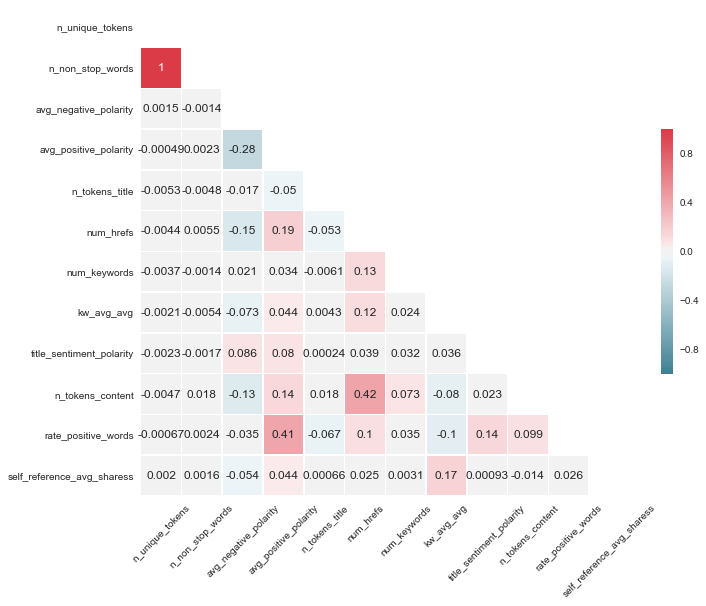

In [104]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df_train[['n_unique_tokens','n_non_stop_words','avg_negative_polarity','avg_positive_polarity','n_tokens_title','num_hrefs','num_keywords','kw_avg_avg','title_sentiment_polarity','n_tokens_content','rate_positive_words','self_reference_avg_sharess']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

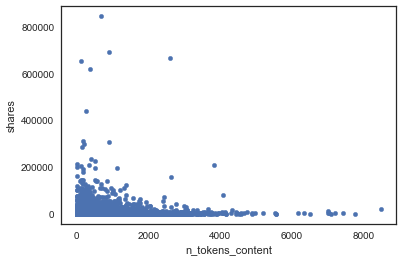

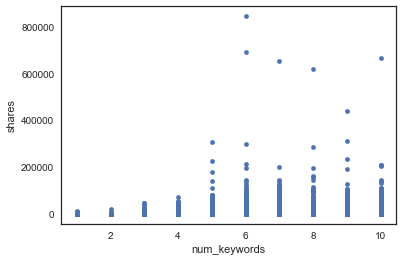

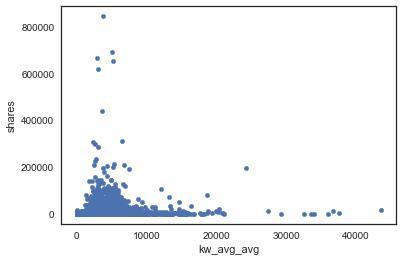

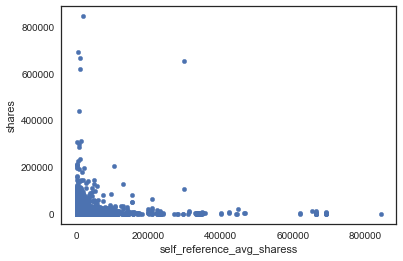

In [108]:
plt.figure()

df.plot(kind='scatter', x='n_tokens_content', y='shares')
df.plot(kind='scatter', x='num_keywords', y='shares')
df.plot(kind='scatter', x='kw_avg_avg', y='shares')
df.plot(kind='scatter', x='self_reference_avg_sharess', y='shares')

                                                                                                  
                         
  


In [80]:

# for now, just a random selection of features. just to lay out the skeleton for a fit
lm = sm.ols(formula="shares ~ n_non_stop_words+n_tokens_title + num_keywords +avg_negative_polarity+avg_positive_polarity+ kw_avg_avg+num_hrefs + title_sentiment_polarity + n_tokens_content + rate_positive_words+self_reference_avg_sharess ", data=df_train).fit()

In [81]:
lm.params

Intercept                    -1370.435316
n_non_stop_words                 2.608515
n_tokens_title                  52.454605
num_keywords                    86.534285
avg_negative_polarity         -922.425683
avg_positive_polarity          342.615455
kw_avg_avg                       1.015800
num_hrefs                       30.145704
title_sentiment_polarity       182.200596
n_tokens_content                -0.230582
rate_positive_words           -374.905654
self_reference_avg_sharess       0.011100
dtype: float64

In [82]:

# keep in mind the value range for shares when interpreting coefficients, i suppose.
# quite different to the 0 or 1 we were dealing with before. 
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [83]:
lm.summary()
# from these random features, there are no notably high p-values. 
# the r-squared value is low, as might be expected from random features.
# we need to develop a good understanding of these metrics, especially p-values,
# r-squared and coef

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     48.67
Date:                Mon, 23 Apr 2018   Prob (F-statistic):          1.07e-106
Time:                        15:21:02   Log-Likelihood:            -2.9692e+05
No. Observations:               27751   AIC:                         5.939e+05
Df Residuals:                   27739   BIC:                         5.940e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1370.4353    526.799     -2.601      0.009   -2402.988    -337.883
n_non_stop_words               2.6085     10.304      0.253      0.800     -17.587      22.804
n_tokens_title                52.4546     30.522      1.719      0.086      -7.370     112.279
num_keywords                  86.5343     34.072      2.540      0.011      19.752     153.316
avg_negative_polarity       -922.4257    534.961     -1.724      0.085   -1970.975     126.124
avg_positive_polarity        342.6155    716.715      0.478      0.633   -1062.181    1747.411
kw_avg_avg                     1.0158      0.053     19.142      0.000       0.912       1.120
num_hrefs                     30.1457      6.480      4.652      0.000      17.445      42.846
title_sentiment_polarity     182.2006    247.332      0.737      0.461    -302.583     666.984
n_tokens_content              -0.2306      0.155     -1.484      0.138      -0.535       0.074
rate_positive_words         -374.9057    379.660     -0.987      0.323   -1119.057     369.246
self_reference_avg_sharess     0.0111      0.003      4.124      0.000       0.006       0.016
==============================================================================
Omnibus:                    75127.674   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4433248562.484
Skew:                          33.161   Prob(JB):                         0.00
Kurtosis:                    1959.943   Cond. No.                     2.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:

df_train.shape

(27751, 60)

In [85]:
# for reference
df_train['shares'].describe()

count     27751.000000
mean       3378.109546
std       10828.778129
min           1.000000
25%         949.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [86]:

train_predictions_sample = df_train[:1000]
predictions = lm.predict(train_predictions_sample)
predictions.describe()
# these predictions are obviously very poor with the current random features model.

count     1000.000000
mean      3342.456635
std       1400.147870
min        575.896615
25%       2472.791920
50%       3076.476120
75%       3899.458765
max      17007.364368
dtype: float64

In [87]:
# get mean squared error
mse = mean_squared_error(df_train['shares'][:1000], predictions)
mse
# something has gone wrong here, obviously. mse is gigantic

98278023.89432785

In [88]:

# root mean squared error for comparison
sqrt(mse)
# need to understand more about these numbers and discuss

9913.527318483964

In [89]:
# turn into classification problem and test accuracy score
# for now, just using a 3395 shares threshold for classification as popular (above the mean value).  
# or could only could extremely high share values as being 'viral' (val 1) and the rest being 
# 'not viral' (val 0)
predictions = predictions.apply(lambda res: 1 if res > 3395 else 0)
# calculate predictions for 'shares' on a sample of the set
predictions.value_counts()

0    615
1    385
dtype: int64

In [90]:

#df_train['shares_binary'] = df_train['shares'].apply((lambda res: 1 if res > 2800 else 0), axis = 1)
# above doesn't work because the single col 'shares' is a series, not a dataframe. axis arg makes no sense
# maybe use df_train[['shares']] instead, which should be a dataframe with just one col

#df_train['shares_binary'] = df_train[['shares']].apply(lambda res: 1 if res > 3395 else 0)
df_train['shares_binary'] = np.where(df_train['shares'] >=3395, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    22042
1     5709
Name: shares_binary, dtype: int64

In [91]:
accuracy_score(df_train['shares_binary'][:1000], predictions) 
# this figure looks not too bad, but it's only predicting membership of the top 25% (if i've dont it right)
# look at other thresholds etc.

0.652

In [92]:
cm = confusion_matrix(df_train['shares_binary'][:1000], predictions)
cm

array([[525, 258],
       [ 90, 127]])

In [93]:
tn, fp, fn, tp = cm.ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ',  fn, '\nTrue positives: ', tp)

True negatives:  525 
False positives:  258 
False negatives:  90 
True positives:  127


In [94]:
print(classification_report(df_train['shares_binary'][:1000], predictions))

             precision    recall  f1-score   support

          0       0.85      0.67      0.75       783
          1       0.33      0.59      0.42       217

avg / total       0.74      0.65      0.68      1000



In [95]:
test_predictions = lm.predict(df_test)
test_predictions.describe()

count    11893.000000
mean      3378.427861
std       1462.046936
min       -232.309318
25%       2472.703656
50%       3057.143408
75%       3950.405512
max      33005.738648
dtype: float64

In [96]:
# get mean squared error
mse = mean_squared_error(df_test['shares'][:1000], predictions)
mse

114910183.585

In [97]:
rmse = sqrt(mse)
rmse
# again, this seems like a more realistic figure. look into what's going on

10719.61676483819

In [98]:
test_predictions = test_predictions.apply(lambda res: 0 if res<3395 else 1)

In [99]:
test_predictions

27011    1
35414    1
20474    1
1228     0
896      0
34183    0
32431    0
16584    0
25214    0
28883    0
29853    1
3663     1
37370    0
21753    1
29665    1
382      0
5673     1
29323    1
23548    1
841      0
21747    0
30449    0
11773    0
36601    0
5201     0
29049    1
8027     1
19318    1
4987     0
34318    1
17922    1
25661    0
27913    0
30032    1
20048    1
24697    0
33593    0
5523     1
16277    1
25418    0
34333    0
2645     1
8007     0
8344     0
13839    0
24905    1
1588     1
8498     1
8594     1
9300     1
33395    1
24643    0
28669    0
29812    1
18190    1
23652    0
32735    0
2781     0
15573    1
5106     0
20390    0
8922     0
4259     0
5612     1
18384    0
8721     0
24388    1
595      0
15113    1
24962    0
36404    0
15294    0
18210    1
6045     1
20801    0
4645     0
21247    0
13001    1
29840    0
7530     0
36001    0
32615    1
60       0
13996    1
11580    0
2438     0
5558     0
6719     0
10767    1
23816    0
22080    0

In [100]:
df_test['shares_binary'] = np.where(df_test['shares'] >=3395, 1, 0)

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
accuracy_score(df_test['shares_binary'], test_predictions)

0.6503825779870512

In [102]:
confusion_matrix(df_test['shares_binary'], test_predictions)

array([[6314, 3146],
       [1012, 1421]])

In [103]:
print(classification_report(df_test['shares_binary'][:1000], predictions))

             precision    recall  f1-score   support

          0       0.85      0.67      0.75       783
          1       0.33      0.59      0.42       217

avg / total       0.74      0.65      0.68      1000

